In [1]:
import numpy as np
from statistics import mean
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_parameters(xs, ys):
    m = ((mean(xs)*mean(ys)) - mean(xs*ys)) / ((mean(xs)**2) - mean(xs*xs))
    b = mean(ys) - m*mean(xs)
    return m, b

def SE(y1, y2):
    return sum((y2 - y1)**2)

def r_squared(y1, y2):
    y_mean = [mean(y1) for y in y1]
    se_reg = SE(y1, y2)
    se_y_mean = SE(y1, y_mean)
    return 1 - (se_reg/se_y_mean)

In [3]:
def create_dataset(hm, variance, step, correlation=False):
    z = 1
    xs = []
    ys = []
    for i in range(hm):
        xs.append(i)
        ys.append(z + random.randrange(-variance, variance))
        if correlation and correlation == 'pos':
            z += step
        elif correlation and correlation == 'neg':
            z -= step
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

In [4]:
xs, ys = create_dataset(15, 20, 3, 'pos')
test_set = [20, 22, 30, 17]

In [5]:
m, b = get_parameters(xs, ys)
reg_line = [(m*x+b) for x in xs]
r2 = r_squared(ys, reg_line)

print(f"R2 Score: {np.round(r2, decimals=3)}")

R2 Score: 0.509


Input: 20 | Prediction: 47.344
Input: 22 | Prediction: 52.423
Input: 30 | Prediction: 72.737
Input: 17 | Prediction: 39.726


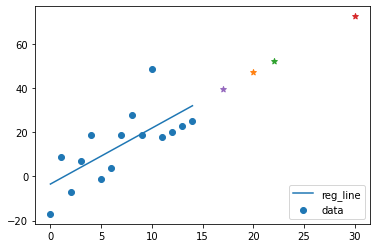

In [6]:
plt.scatter(xs, ys, label="data")
plt.plot(xs, reg_line, label="reg_line")
for t in test_set:
    prediction = m*t + b
    plt.scatter(t, prediction, marker="*")
    print(f"Input: {t} | Prediction: {np.round(prediction, decimals=3)}")

plt.legend(loc=4)
plt.show()